<a href="https://colab.research.google.com/github/manoharvirati/Face-EyeDetector-HaarCascade/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [19]:
data_frame=pd.read_csv('Churn_Modelling.csv')
data_frame.drop('Surname',axis=1,inplace=True)
data_frame.drop('RowNumber',axis=1,inplace=True)
c_id=data_frame['CustomerId']
data_frame.drop('CustomerId',axis=1,inplace=True)
#data_frame.drop('Gender',axis=1,inplace=True)

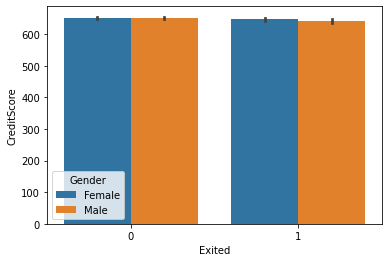

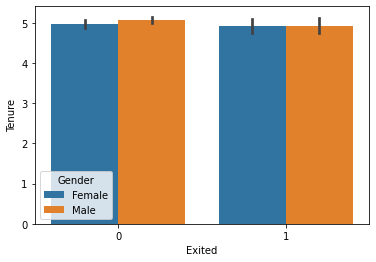

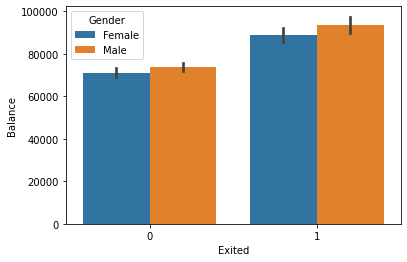

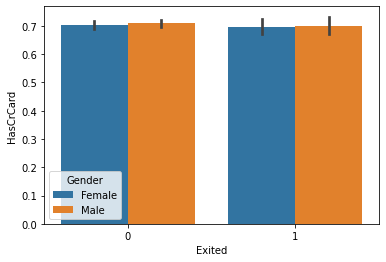

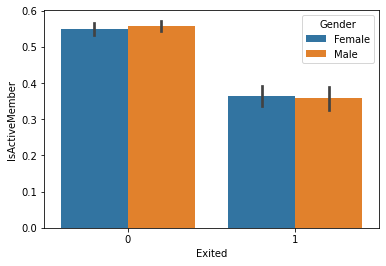

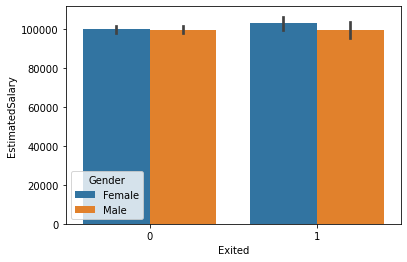

In [14]:
c=['CreditScore','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary']
for i in c:
  plt.figure()
  sns.barplot(x='Exited',y=i,hue='Gender',data=data_frame)

In [15]:
print(data_frame.isnull().sum()/data_frame.shape[0])
for i in data_frame.select_dtypes(include=['object']).columns.tolist():
  lb=LabelEncoder()
  data_frame[i]=lb.fit_transform(data_frame[i])
print(data_frame.info())
target=data_frame['Exited']
data_frame.drop('Exited',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=MinMaxScaler()
k=scale.fit_transform(data_frame)
data_frame=pd.DataFrame(k,columns=data_frame.columns)
print(data_frame.head())

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_frame,target,test_size=0.2,random_state=10)
print(x_train.shape,y_train.shape)
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(x_train.columns)

(8000, 10) (8000,)
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.60      0.14      0.23       422

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

[[1537   41]
 [ 361   61]]
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [17]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,3):
    
    model2=KNeighborsClassifier()
    model2.fit(x_train,y_train)
    pred=model2.predict(x_test)
    print(confusion_matrix(y_test,pred))

[[1495   83]
 [ 301  121]]
[[1495   83]
 [ 301  121]]
